**Leo Qian**

Fall 2021

CS 251: Data Analysis and Visualization

Project 5: Clustering

In [8]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

In [9]:
import pandas as pd

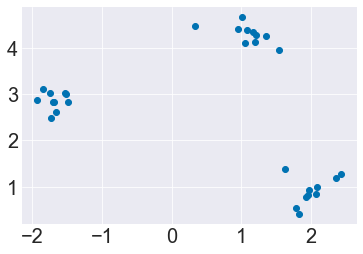

In [10]:
simple_data = pd.read_csv("data/super_simple.csv")

plt.scatter(simple_data[["x"]],simple_data[["y"]])

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it. You determine the centroid of each cluster by finding the mean of all the points in the cluster. But what if there are no points? you should check to see if a cluster is empty. If so, then assign that cluster's centroid a randomly chosen value (e.g a random point from the data set)
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$ for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [14]:
super_simple = simple_data.to_numpy()

cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [16]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [18]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [20]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [26]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `assign_labels`

In [27]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.assign_labels(init_centroids)
print(f'After the first assign data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first assign data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids`

In [29]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]


You should see:

    After the first centroid update, your cluster assignments are:
        [[ 1.09087  4.29295]
         [-1.68133  2.85917]
         [ 2.00717  0.9184 ]]
    Your difference from previous centroids:
        [[ 0.75287 -0.17425]
         [ 0.15877 -0.25313]
         [ 0.21407  0.3757 ]]

#### Test `inertia`

In [30]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.10738760429999998
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot. Make sure that the cluster assignment looks like the following image:

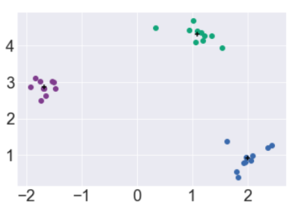

3


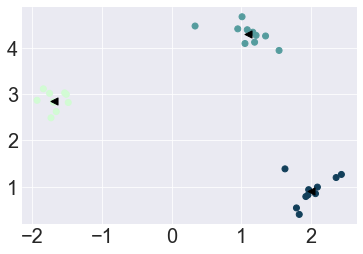

In [38]:
np.random.seed(0)
intertia,i = cluster.cluster(3,max_iter=6)
print(i)
cluster.plot_clusters()


### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset. This is the first step in a two-step implementation. For this simple data set, the clusters are not as sensitive to the initial conditions (randomly chosen centroids) as for other data. We will be making the elbow plot with just one run of kmeans per number of clusters.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

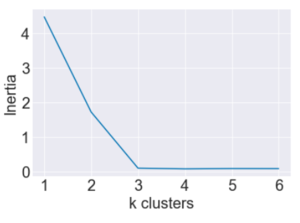

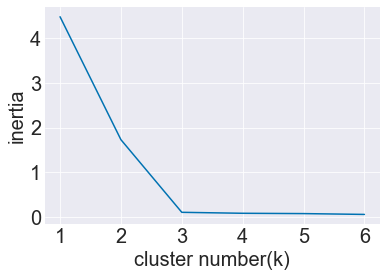

In [46]:

cluster.elbow_plot(6)

**Question 1:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer:** there are 3 clusters as inertia doesn't decrease much after reaching 3

#### Determine number of clusters in `five_blobs` dataset

- Load in the `five_blobs` dataset.
- Repeat 5 times:
    - Run K-means on it.
    - Create a scatterplot to visualize the clustering.
    - Print the inertia or include it in the title

**NOTE:** Keep the random seed line in each of the 5 cells below.

In [51]:
# Load in the data and put it into a matrix in this cell
five_blobs = pd.read_csv("data/five_blobs.csv").to_numpy()
five_blobs_cluster = kmeans.KMeans(five_blobs)

145.36660394477195
60.58757217336966
33.5760486782575
25.549463534002772
21.763441180144238


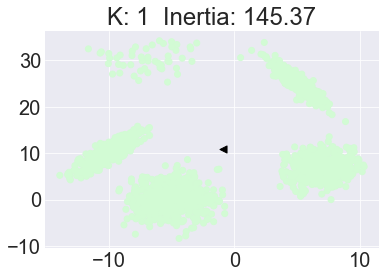

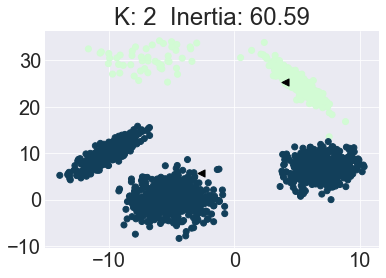

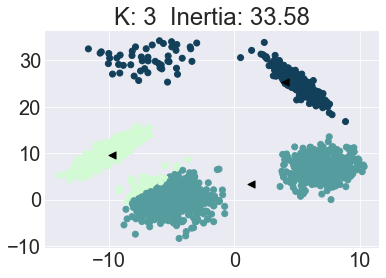

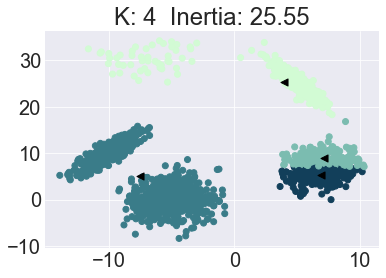

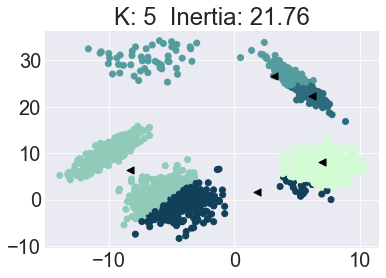

In [60]:
# Run the clustering algorithm and plot the results for one seed.
np.random.seed(0)

for i in range(5):
    inertia,_ = five_blobs_cluster.cluster(i+1)
    plt.figure()
    five_blobs_cluster.plot_clusters()
    plt.title(f'K: {i+1}  Inertia: {inertia:.2f}')
    print(inertia)

145.36660394477195
70.96345828167294
26.296211612347438
10.852427405538638
28.90919569437869


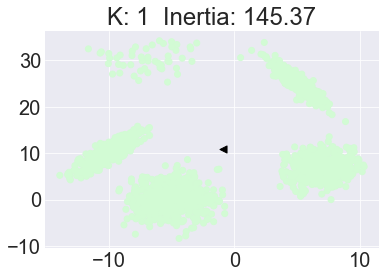

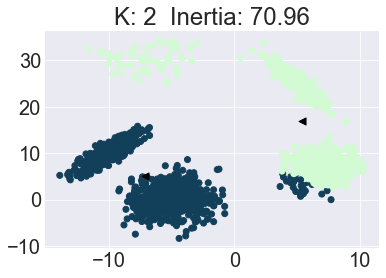

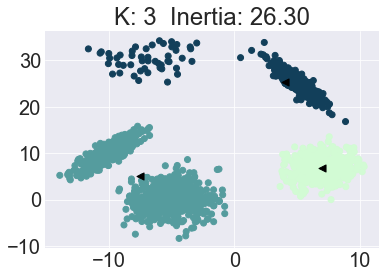

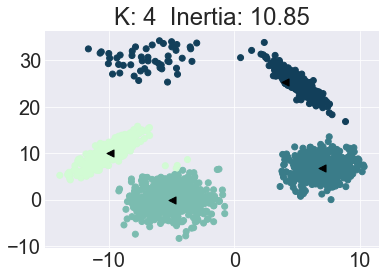

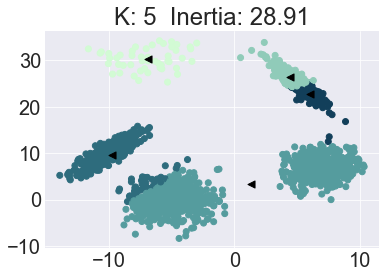

In [61]:
# Run the clustering algorithm and plot the results for a second seed.
np.random.seed(1)
for i in range(5):
    inertia,_ = five_blobs_cluster.cluster(i+1)
    plt.figure()
    five_blobs_cluster.plot_clusters()
    plt.title(f'K: {i+1}  Inertia: {inertia:.2f}')
    print(inertia)

145.36660394477195
60.587761092401024
33.5760486782575
10.852427405538638
10.09371958346706


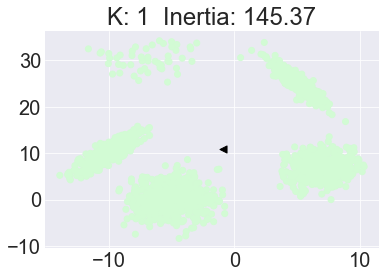

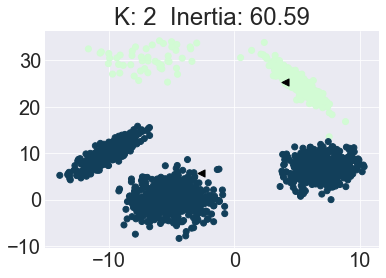

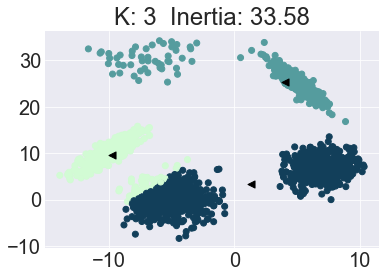

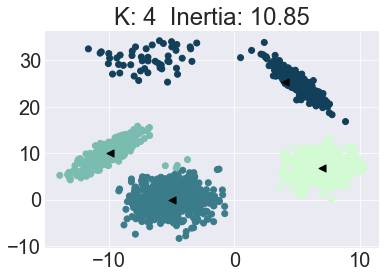

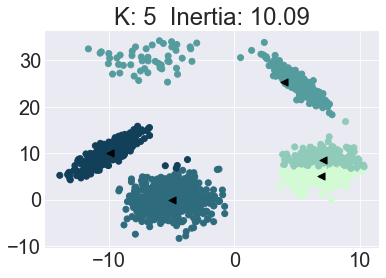

In [62]:
# Run the clustering algorithm and plot the results for a third seed.
np.random.seed(2)
for i in range(5):
    inertia,_ = five_blobs_cluster.cluster(i+1)
    plt.figure()
    five_blobs_cluster.plot_clusters()
    plt.title(f'K: {i+1}  Inertia: {inertia:.2f}')
    print(inertia)

145.36660394477195
67.8340710797648
45.26427719714109
11.073512216794398
7.116345982439033


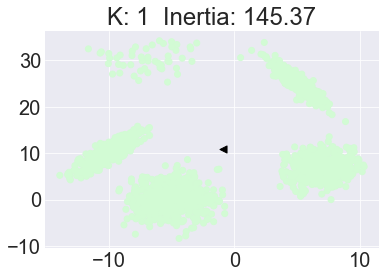

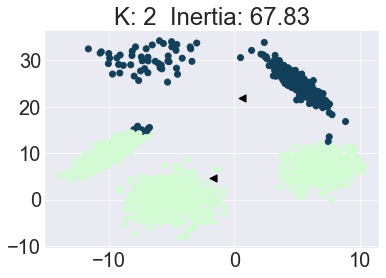

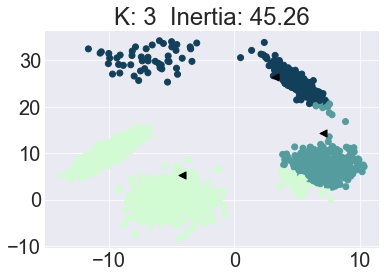

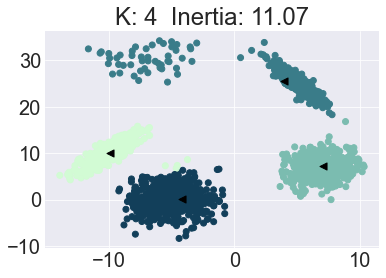

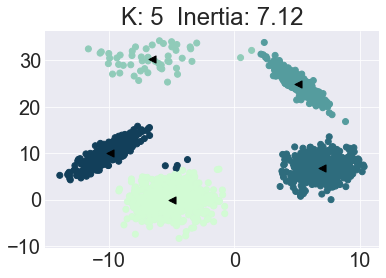

In [63]:
# Run the clustering algorithm and plot the results for a fourth seed.
np.random.seed(3)
for i in range(5):
    inertia,_ = five_blobs_cluster.cluster(i+1)
    plt.figure()
    five_blobs_cluster.plot_clusters()
    plt.title(f'K: {i+1}  Inertia: {inertia:.2f}')
    print(inertia)

145.36660394477195
60.72639389383764
26.90841832088944
10.852510169674412
7.116345982439033


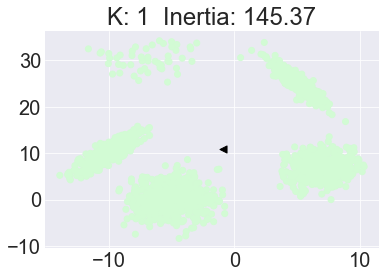

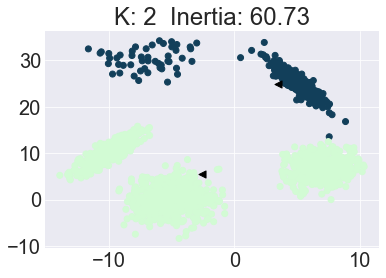

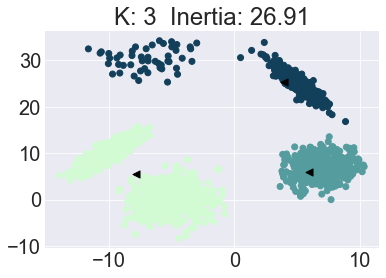

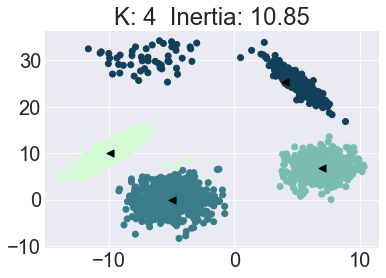

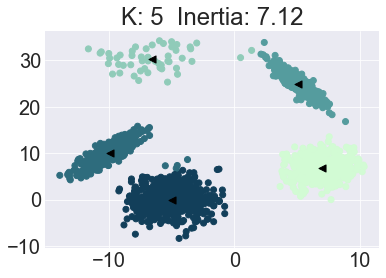

In [64]:
# Run the clustering algorithm and plot the results for a fifth seed.
np.random.seed(4)
for i in range(5):
    inertia,_ = five_blobs_cluster.cluster(i+1)
    plt.figure()
    five_blobs_cluster.plot_clusters()
    plt.title(f'K: {i+1}  Inertia: {inertia:.2f}')
    print(inertia)

**Question 2:** What's wrong with clusters shown in the scatterplots? Why does it happen? Does the value of the inertia make sense for each of the images?

**Answer:** Due to different initial condition, the outcome of the clustering process will also change. The inertia does make sense of this issue which when the blobs are are separated correctly in the last image, the inertial also seems to be the lowest

**Question 3:** An elbow plot should show that increasing the number of clusters decreases the inertia. Does this plot have that trend? If not, why not?

**Answer:** yes, when the number of k increases, the inertia obviously decreases but as the k increases beyond 5, the inertia may not decrease that much any more

#### Run K-means multiple times, save the best clustering

To address the problems faced above, we can run K-means multiple times and take the best results for our clustering.

- Implement `cluster_batch`
- Run `cluster_batch` with a sensible $k$ value and `n_iter=10`
- Run `plot_clusters` again.
- Report the inertia either by printing it out or adding to the figure title.

Text(0.5, 1.0, 'K: 3  Inertia: 26.30')

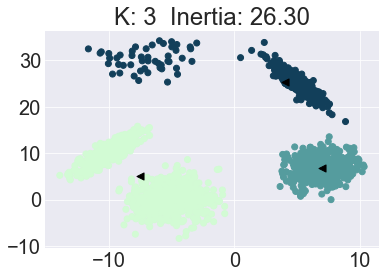

In [72]:

five_blobs_cluster.cluster_batch(3,10)

five_blobs_cluster.plot_clusters()
plt.title(f'K: {3}  Inertia: {five_blobs_cluster.inertia:.2f}')

**Question 4:** Did the clustering improve? Why?

**Answer:** Yes, comparing to the k-3 graphs of the previous step, this graph has the best inertia since with multiple trials, the program is able to find a better initial condition.

#### Improve the elbow plot for the `five_blobs` dataset

This is the second step in a two-step implementation of the `elbow_plot`. We have seen that k-means clustering can be sensitive to initial conditions, and that it is helpful to run it multiple times to find the best clusters. In this step, we alter `elbow_plot` to call `cluster_batch` instead of `cluster`.

- Add a parameter `n_iter` to `elbow_plot` in `kmeans.py`. Give it a default value of 1. (And don't forget to update the docstring to include the new parameter!)
- Change the `elbow_plot` code to call `cluster_batch` instead of `cluster`.
- Create an elbow plot showing the inertia with different $k$ values. This could take a long time to run, so we suggest using `n_iter=10` and a maximum `k` of 10.

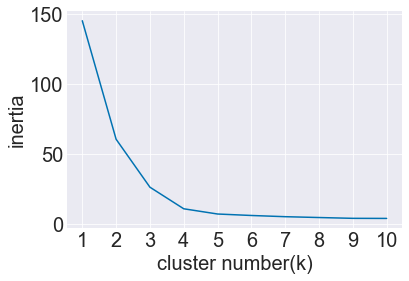

In [74]:
five_blobs_cluster.elbow_plot(10,10)

**Question 5:** Does this elbow plot look more like we expected than the original? How many clusters are there? Is it easy or hard to determine? Does it make sense?

**Answer:** yes, this elbow plot is what I expected and there's are roughtly 4-5 clusters since higher number of clusters doesn't make significant change to inertia any more

## Task 2: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [76]:
from matplotlib.image import imread

([], [])

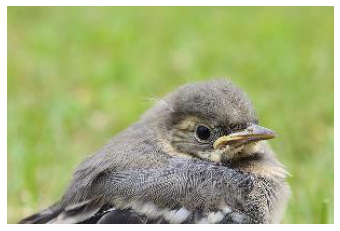

In [112]:
baby_bird = imread("data/baby_bird.jpeg")
plt.imshow(baby_bird)
plt.xticks([])
plt.yticks([])

### 2b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [78]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    return img.reshape((img.shape[0]*img.shape[1],img.shape[2]))

In [113]:
baby_bird_flattened = flatten(baby_bird)

### 2c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [114]:
baby_bird_cluster = kmeans.KMeans(baby_bird_flattened)

baby_bird_cluster.cluster_batch(4,10)

def replace_color_with_centroid(original, centroid, labels):
    for i in range(original.shape[0]):
        original[i] = centroid[labels[i]]
    
    return original

replaced = replace_color_with_centroid(baby_bird_cluster.data, baby_bird_cluster.centroids, baby_bird_cluster.data_centroid_labels)

### 2d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

([], [])

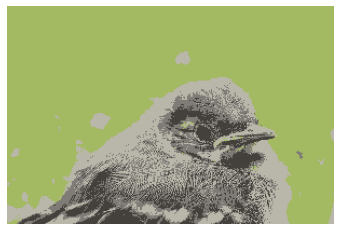

In [115]:
replaced = replaced.reshape((baby_bird.shape[0],baby_bird.shape[1],baby_bird.shape[2]))

plt.imshow(replaced)
plt.xticks([])
plt.yticks([])

### 2e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

([], [])

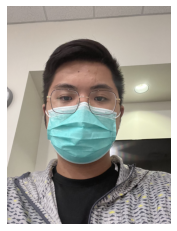

In [117]:
my_img = imread("data/self.png")
plt.imshow(my_img)
plt.xticks([])
plt.yticks([])


In [118]:
my_img_flattened = flatten(my_img)

In [120]:
my_img_cluster = kmeans.KMeans(my_img_flattened)

my_img_cluster.cluster_batch(4,1)

replaced = replace_color_with_centroid(my_img_cluster.data, my_img_cluster.centroids, my_img_cluster.data_centroid_labels)

([], [])

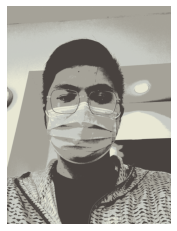

In [121]:
replaced = replaced.reshape((my_img.shape[0],my_img.shape[1],my_img.shape[2]))

plt.imshow(replaced)
plt.xticks([])
plt.yticks([])

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

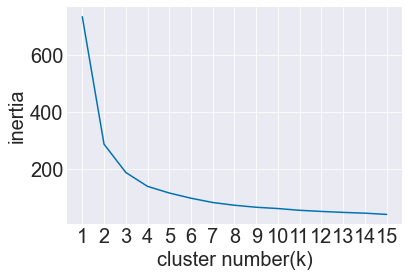

In [124]:
heart_cluster = kmeans.KMeans(pd.read_csv("data/heart.csv").to_numpy())

heart_cluster.elbow_plot(15,10)

we can see some significant drop in inertia for k of 300, 200, 175, and that the inertia continue to drop at a slower rate after these points.

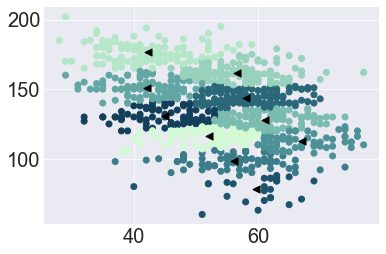

In [140]:
heart_cluster.cluster(10)

heart_cluster.plot_clusters()
plt.xlabel("age")
plt.ylabel("maximum heart rate")

we can see that for the clusteres we see, there's a not so obvious negative correlation between age and maximum heart rate as we can see that the centriod on the left most are gennerally lower than centroid on the right most. But we can also see variation between maximum heart rate within the same age group meaning there are more factors to consider before making the conclusion. Normally, I feel a pca may work better with this analysis to determine which are the factors that affect the maximum heart rate. 

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. siloutte score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?